In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
import math
import scipy.interpolate as spi

In [2]:
D = 3
N = 1e8
true_nlist = [1.5, 3, 6, 12, 24]
m = 2/3
nlist = [round(tnn/(1-m)-1, 4) for tnn in true_nlist]
s = 1.0
sclist = [0.1, 0.5, 1.0]
sclist = [0.1, 0.5]
L = 1.0
num_empty = 200
res_dir = 'nsc-setisaturday-numempty200'
randix = 0


moon_dia_arcminutes = 29.33;
moon_dia_degrees = moon_dia_arcminutes * (1/60);
moon_dia_radians = moon_dia_arcminutes * (1/60) * (math.pi/180);
plt.rcParams['figure.constrained_layout.use'] = True

In [3]:
plot_data = {}
cmap = plt.get_cmap('viridis')
mycols = cmap(np.linspace(0, 1, len(nlist)))
scstyles = ['-', '-.', ':']
for sc in sclist:
    c = s / sc
    for nix, n in enumerate(nlist):
        true_n = true_nlist[nix]
        fout = (
            f"{res_dir}/D={D}_n={float(n)}_N={N:.2e}_"
            f"s={s:.1f}_L={L:.1f}_c={c:.5e}_r={randix}"
        )
        res = pd.read_csv(fout+'.csv')
        fig = plt.figure()
        (counts, bins, patches) = plt.hist(
            res.MaxAngle, cumulative=True, histtype='step', 
            density=True, bins=res.shape[0])
        countsSmooth = pd.Series(data=counts).rolling(
            window=100, min_periods=1, win_type='gaussian', center=True
        ).mean(std=10)
        fig.clf()
        plot_data[(true_n, sc)] = (bins[0:-1], countsSmooth)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [4]:
plot_data = {}
cmap = plt.get_cmap('viridis')
mycols = cmap(np.linspace(0, 1, len(nlist)))
scstyles = ['-', '-.', ':']
n_perms = 5
for sc in sclist:
    c = s / sc
    for nix, n in enumerate(nlist):
        interp_bins = np.linspace(0, math.pi, 100000)
        interp_counts = np.zeros((n_perms, 100000))
        for randix in range(0, n_perms):
            true_n = true_nlist[nix]
            fout = (
                f"nsc-boundary/D={D}_n={float(n)}_N={N:.2e}_"
                f"s={s:.1f}_L={L:.1f}_c={c:.5e}_r={randix}"
            )
            res = pd.read_csv(fout+'.csv')
            fig = plt.figure()
            (counts, bins, patches) = plt.hist(
                res.MaxAngle, cumulative=True, histtype='step', 
                density=True, bins=res.shape[0])  
            fig.clf()
            interp_f = spi.interp1d(bins[0:-1], counts, bounds_error=False)
            interp_counts[randix,:] = interp_f(interp_bins)           
        plot_data[(true_n, sc)] = (interp_bins, np.mean(interp_counts, axis=0))

<ipython-input-4-d5c7c3406ee4>:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<ipython-input-5-788adad1ca60>:23: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout(rect=(0, 0.05, 0.7, 1))


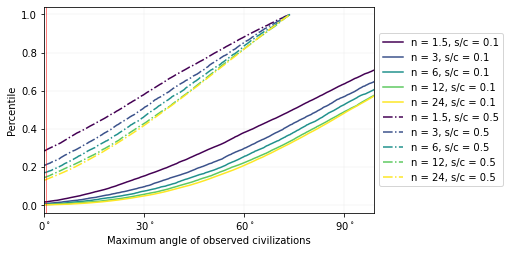

In [5]:
fig = plt.figure(figsize=(8,4))
ax  = fig.add_subplot(111)
leg = []
for scix, sc in enumerate(sclist):
    for nix, true_n in enumerate(true_nlist):
        (bins, counts) = plot_data[(true_n, sc)]
        #plt.step(bins, counts, scstyles[scix], color=mycols[nix], where='post')
        plt.plot(bins, counts, scstyles[scix], color=mycols[nix])
        leg.append(f"n = {true_n}, s/c = {sc:.2}")
#leg = [f"n = {nn}" for nn in true_nlist]
plt.legend(leg, loc = 'center left', bbox_to_anchor = (1.0, 0.5))
plt.plot([moon_dia_radians, moon_dia_radians], [-0.05, 1.05],'r', linewidth=0.5);
ax.set_position([0.1,0.1,0.5,0.8])
plt.gca().set_ylabel('Percentile')
plt.gca().set_xlabel('Maximum angle of observed civilizations');
#plt.gca().set_title(f'D={D} N={N:.2e} s={s:.1f} L={L:.1f}');
#plt.gca().set_xscale('log')
plt.gca().set_xticks([0, 0.5*math.pi*(1/3), 0.5*math.pi*(2/3), 0.5*math.pi*(3/3)]);
plt.gca().set_xticklabels(['0$^\circ$', '30$^\circ$', '60$^\circ$', '90$^\circ$']);
plt.gca().set_ylim(-0.04, 1.04)
plt.gca().set_xlim(0, 0.5*math.pi*(3/3)*1.1);
plt.grid(linewidth=0.1);
plt.tight_layout(rect=(0, 0.05, 0.7, 1))
fig.savefig('figures-friday/plotG.png', dpi=200)

<ipython-input-7-b03c6bceac6e>:27: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout(rect=(0, 0.05, 0.7, 1))


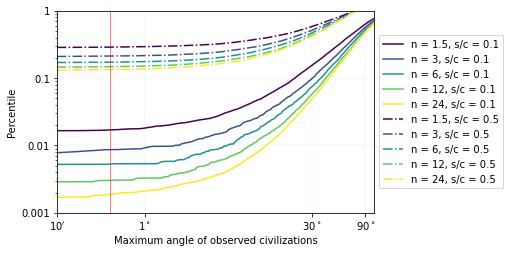

In [7]:
fig = plt.figure(figsize=(8,4))
ax  = fig.add_subplot(111)
leg = []
for scix, sc in enumerate(sclist):
    for nix, true_n in enumerate(true_nlist):
        (bins, counts) = plot_data[(true_n, sc)]
        #plt.step(bins, counts, scstyles[scix], color=mycols[nix], where='post')
        plt.plot(bins, counts, scstyles[scix], color=mycols[nix])
        leg.append(f"n = {true_n}, s/c = {sc:.2}")
#leg = [f"n = {nn}" for nn in true_nlist]
plt.legend(leg, loc = 'center left', bbox_to_anchor = (1.0, 0.5))
plt.plot([moon_dia_radians, moon_dia_radians], [-0.05, 1.001],'r', linewidth=0.5);
ax.set_position([0.1,0.1,0.5,0.8])
plt.gca().set_ylabel('Percentile')
plt.gca().set_xlabel('Maximum angle of observed civilizations');
#plt.gca().set_title(f'D={D} N={N:.2e} s={s:.1f} L={L:.1f}');
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.gca().set_xticks([0,(10/60)*math.pi/180, 1*math.pi/180, 30*math.pi/180,90*math.pi/180]);
plt.gca().set_xticklabels(['0$^\circ$', '10$\'$', '1$^\circ$','30$^\circ$', '90$^\circ$']);
plt.gca().set_ylim(0.001, 1.00)
plt.gca().set_yticks([1e-3, 1e-2, 1e-1, 1])
plt.gca().set_yticklabels([1e-3, 1e-2, 1e-1, 1])
plt.gca().set_xlim((10/60)*math.pi/180, 90*math.pi/180*1.2)
plt.gca().tick_params(axis='x',which='minor',bottom=False);
plt.grid(linewidth=0.1);
plt.tight_layout(rect=(0, 0.05, 0.7, 1))

fig.savefig('figures-friday/plotG-loglog.png', dpi=200)

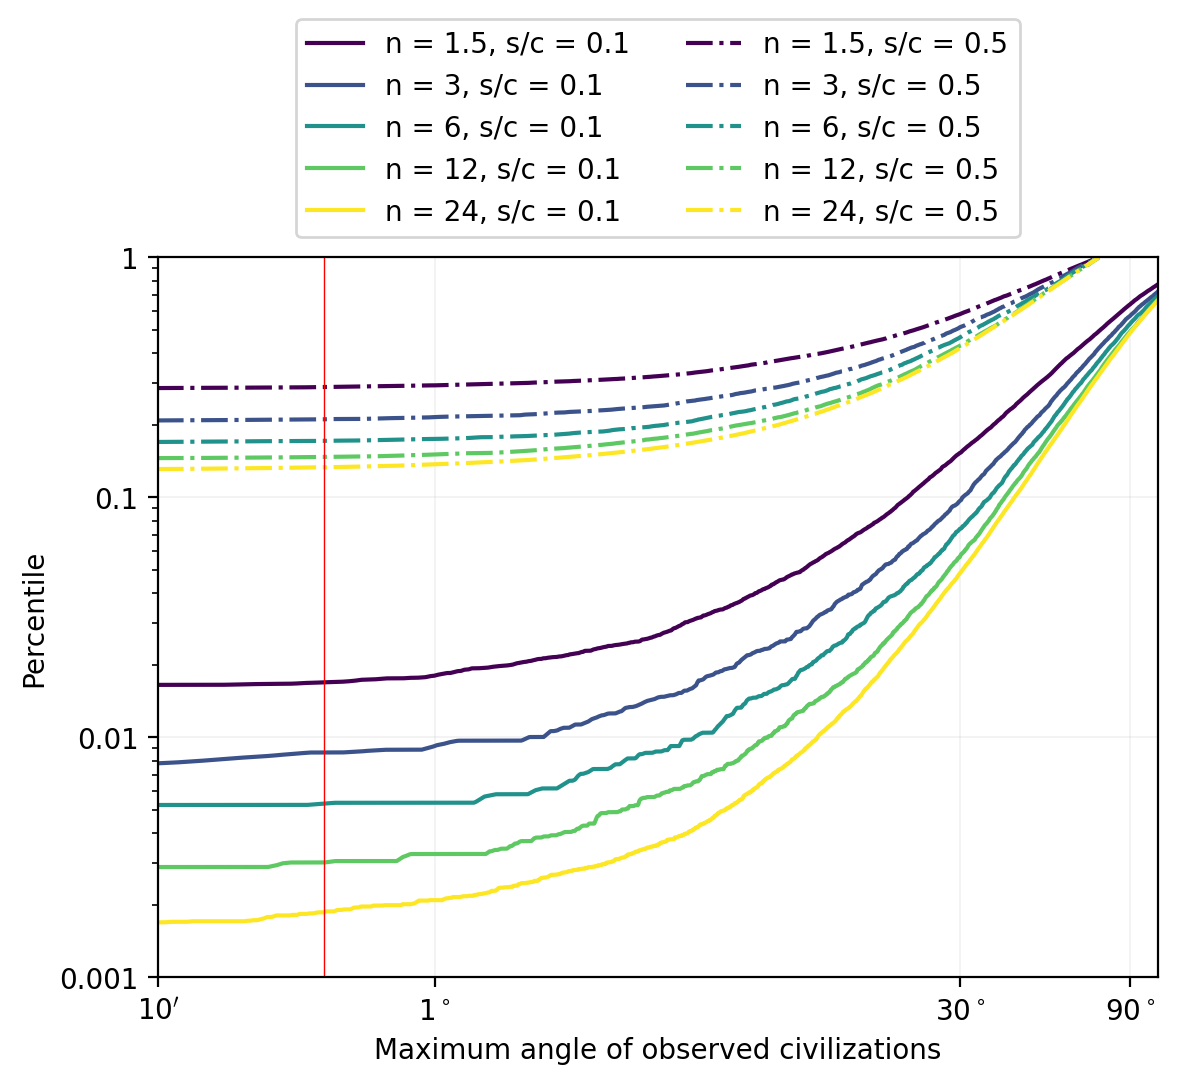

In [18]:
fig = plt.figure(figsize=(5,6),dpi=200)
#ax  = fig.add_subplot(111)
leg = []
for scix, sc in enumerate(sclist):
    for nix, true_n in enumerate(true_nlist):
        (bins, counts) = plot_data[(true_n, sc)]
        #plt.step(bins, counts, scstyles[scix], color=mycols[nix], where='post')
        plt.plot(bins, counts, scstyles[scix], color=mycols[nix])
        leg.append(f"n = {true_n}, s/c = {sc:.2}")
#leg = [f"n = {nn}" for nn in true_nlist]
plt.legend(leg, loc = 'upper center', bbox_to_anchor = (0.5, 1.35), ncol=2)
plt.plot([moon_dia_radians, moon_dia_radians], [-0.05, 1.001],'r', linewidth=0.5);
plt.gca().set_position([0.0,1.0,1.0,0.60])
plt.gca().set_ylabel('Percentile')
plt.gca().set_xlabel('Maximum angle of observed civilizations');
#plt.gca().set_title(f'D={D} N={N:.2e} s={s:.1f} L={L:.1f}');
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.gca().set_xticks([0,(10/60)*math.pi/180, 1*math.pi/180, 30*math.pi/180,90*math.pi/180]);
plt.gca().set_xticklabels(['0$^\circ$', '10$\'$', '1$^\circ$','30$^\circ$', '90$^\circ$']);
plt.gca().set_ylim(0.001, 1.00)
plt.gca().set_yticks([1e-3, 1e-2, 1e-1, 1])
plt.gca().set_yticklabels([1e-3, 1e-2, 1e-1, 1])
plt.gca().set_xlim((10/60)*math.pi/180, 90*math.pi/180*1.2)
plt.gca().tick_params(axis='x',which='minor',bottom=False);
plt.grid(linewidth=0.1);
#plt.tight_layout(rect=(0, 0.05, 0.7, 1))

fig.savefig('figures-friday/plotG-loglog-legendabove.png', dpi=200, bbox_inches = 'tight')